In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = '../../data/processed/Brazil/census_data/2010/weightening_area/universal_results/states/RS/'

In [6]:
categorie = 'Domicilio.csv'
data = pd.read_csv(path+categorie)
data.head()

,Cod_ap,CD_GEOCODM,NM_MUNICIP,V001,V002,V003,V004,V005,V006,V007,...,V233,V234,V235,V236,V237,V238,V239,V240,V241,Unnamed: 243
0,4.300034e+12,4300034,ACEGUÁ,1398,1397,1390,5,0,1016,8,...,194,795,3,579,120,84,5,4,5,0.0
1,4.300059e+12,4300059,ÁGUA SANTA,1169,1165,1135,0,16,884,99,...,92,228,1,157,47,18,2,3,2,0.0
2,4.300109e+12,4300109,AGUDO,5534,5425,5136,12,268,3973,325,...,391,1587,0,751,613,144,27,52,112,0.0
3,4.300208e+12,4300208,AJURICABA,2467,2456,2382,0,74,1914,118,...,120,795,1,41,722,23,1,7,4,0.0
4,4.300307e+12,4300307,ALECRIM,2478,2471,2456,0,3,2007,142,...,9,96,0,7,78,8,0,3,10,0.0


In [19]:
columns = data.columns.values
constant_columns = (data != data.iloc[0]).any() == False
columns[constant_columns].tolist()

['Unnamed: 243']

In [23]:
data_no_geo = data.drop(['Cod_ap', 'CD_GEOCODM', 'NM_MUNICIP'], axis=1)
sum(data_no_geo.duplicated())

0

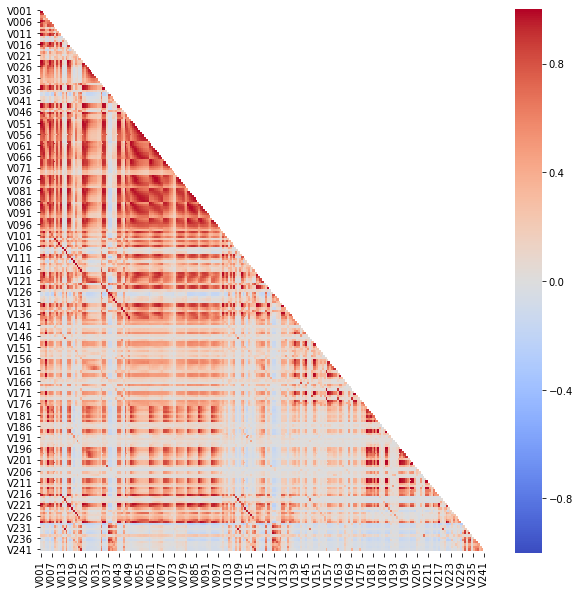

In [60]:
data_corr = data_no_geo.corr()
mask = np.zeros_like(data_corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,10))
sns.heatmap(data_corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=False,
            mask=mask);

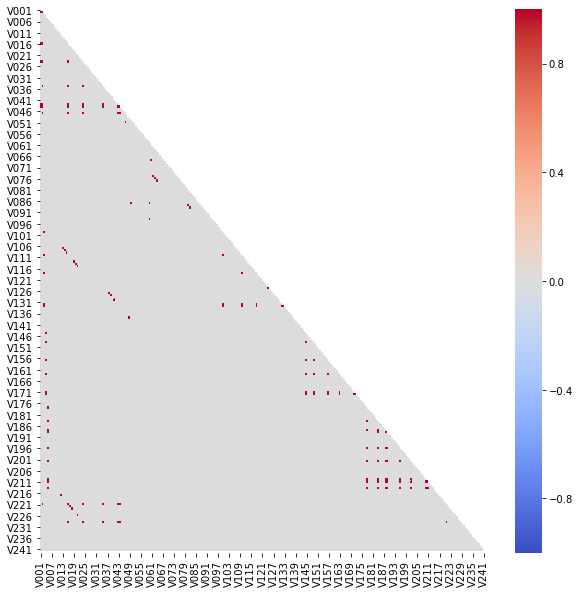

In [61]:
corr = data_corr.copy()
corr[np.abs(corr)<=0.99] = 0
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,10))
sns.heatmap(corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=False,
            mask=mask);

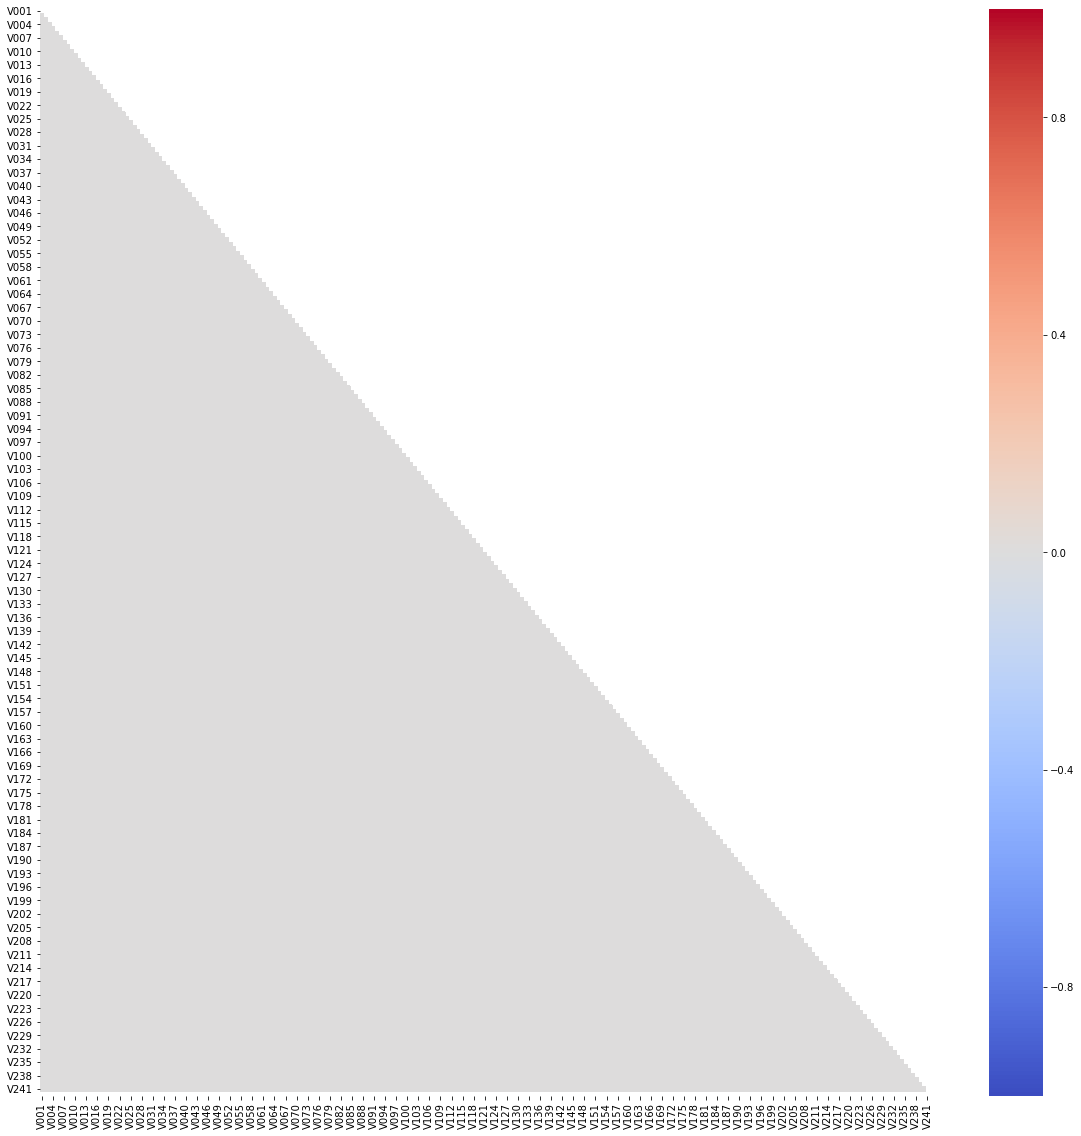

In [59]:
corr = data_corr.copy()
corr[np.abs(corr)< 1] = 0
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,20))
sns.heatmap(corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=False,
            mask=mask);